# Anomaly Detection

#### Dataset

Dataset berisi transaksi yang dilakukan dengan kartu kredit pada bulan September 2013 oleh pemegang kartu Eropa.
Dataset ini menyajikan transaksi yang terjadi dalam dua hari, dimana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

#### Sumber dataset

Dataset berasal dari kaggle dengan link : https://www.kaggle.com/mlg-ulb/creditcardfraud
        
#### Objectivitas

melakukan anomaly detection pada transaksi kartu kredit


#### Features Atribute

* Time = Jumlah detik berlalu antara transaksi saat ini dan transaksi pertama dalam kumpulan data
* V1 - V28 = hasil dari pengurangan Dimensi PCA untuk melindungi identitas pengguna dan fitur sensitif (v1-v28)
* Amount = Nilai Transaksi
* Class = 1 untuk transaksi penipuan, 0 sebaliknya

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Data loading

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

#### melihat data teratas

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### melihat data terbawah

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### melihat informasi data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### melihat statistika data

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### melihat columns

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### melihat dimensi data

In [10]:
data.shape

(284807, 31)

data terdiri atas 31 columns dan 284807 rows

# Data Cleaning

#### melihat missing values

In [11]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

tidak terdapat missing values pada data

# Explorasi Data Analysis

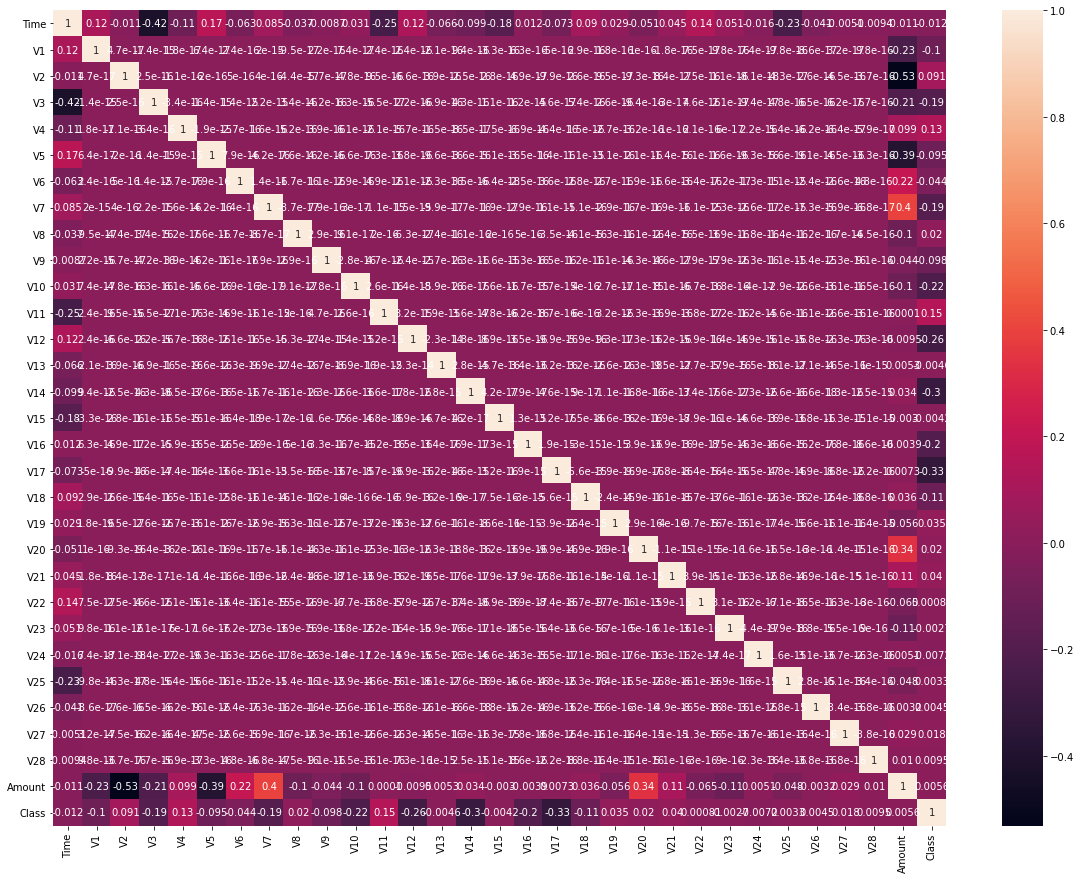

In [12]:
corr = data.corr()
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, annot = True);

#### membuat query numerical features

In [13]:
not_v = ['Time', 'Amount','Class']

V_feat = data.drop(not_v, axis=1)
V_feat.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

#### Visualisasi  Class features

In [14]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

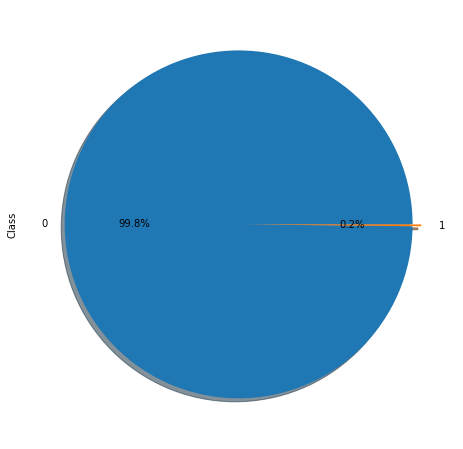

In [15]:
plt.figure(figsize=(8,8))
data['Class'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Dari visualisasi terlihat bahwa data penggunan kartu kredit yang terindikasi melakukan fraud terdapat 492 konsumen (0.2%)

#### Visualisasi hubungan waktu transaksi dengan kejadian fraud

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


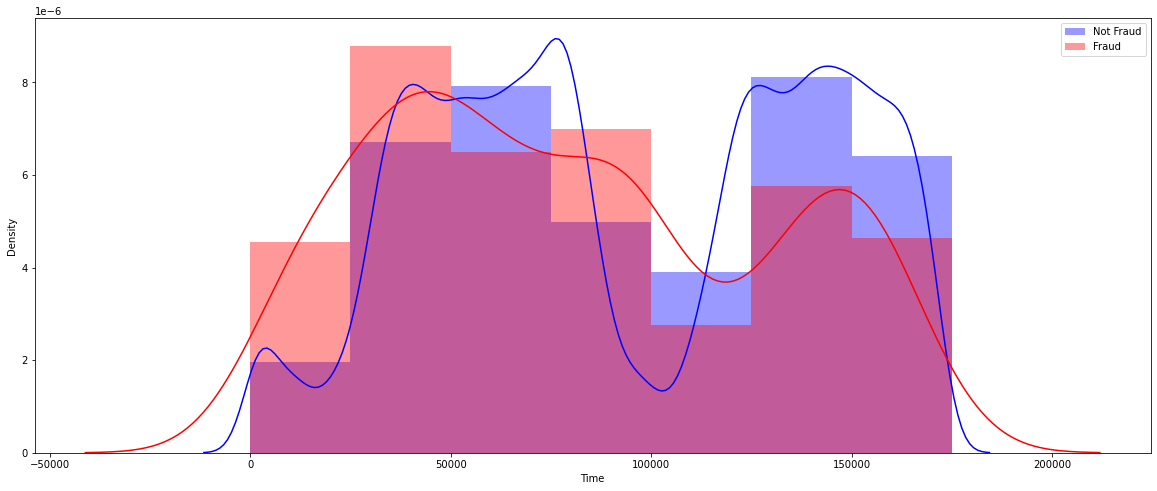

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(data['Time'][data['Class'] == 0], bins=[0, 25000, 50000, 75000, 100000, 125000,150000, 175000], color='b', label='Not Fraud')
sns.distplot(data['Time'][data['Class'] == 1], bins=[0, 25000, 50000, 75000, 100000, 125000,150000, 175000], color='r', label='Fraud')
plt.legend();

dari visualisasi terlihat bahwa konsumen yang melakukan jarak transaksi saat ini dengan transaksi sebelumnya dengan rentang waktu 0 sampai dengan 50.000 detik dan rentang waktu 75.000 sampai dengan 100.000 terindikasi melakukan fraud kartu kredit 

#### visualisasi hubungan jumlah transaksi dengan kejadian fraud

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


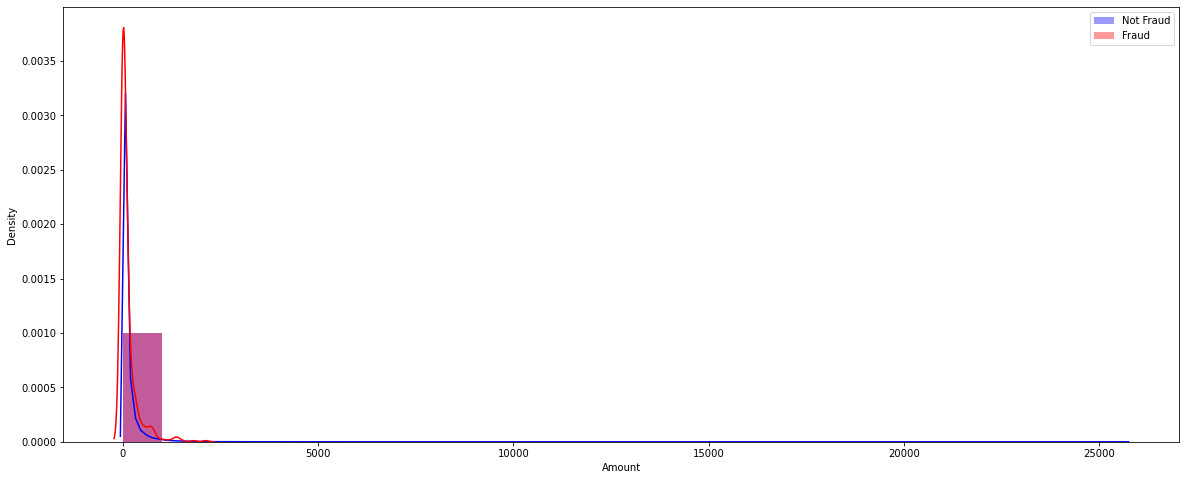

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['Amount'][data['Class'] == 0], bins=[0, 1000], color='b', label='Not Fraud')
sns.distplot(data['Amount'][data['Class'] == 1], bins=[0, 1000], color='r', label='Fraud')
plt.legend();

Dari visualisasi terlihat bahwa nilai transaksi kartu kredit yang terindikasi melakukan fraud dibawa 500

#### melakukan visualisasi data V

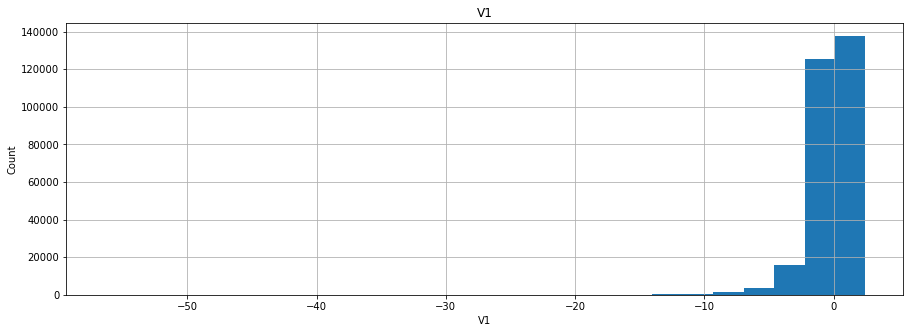

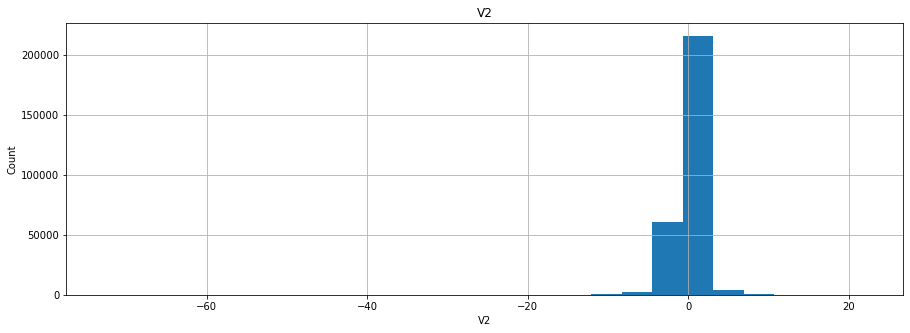

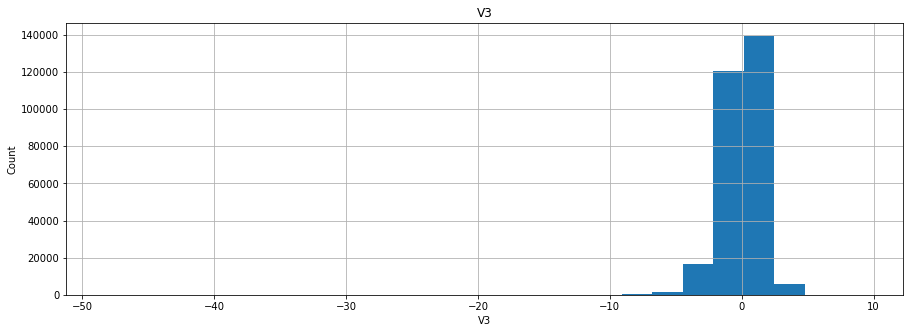

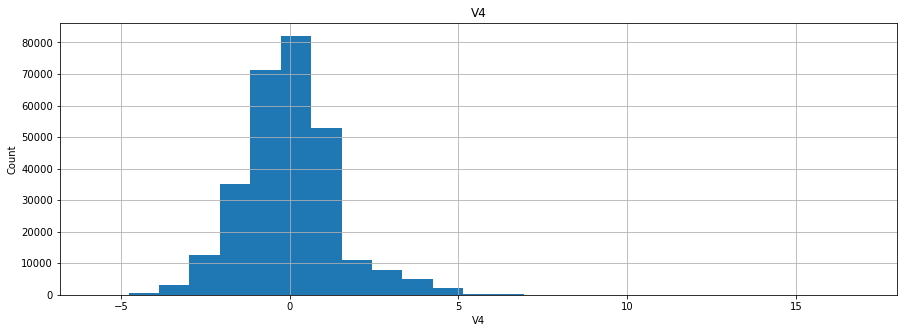

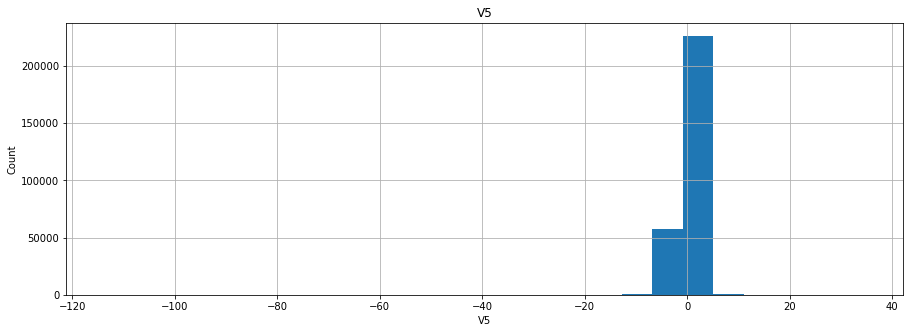

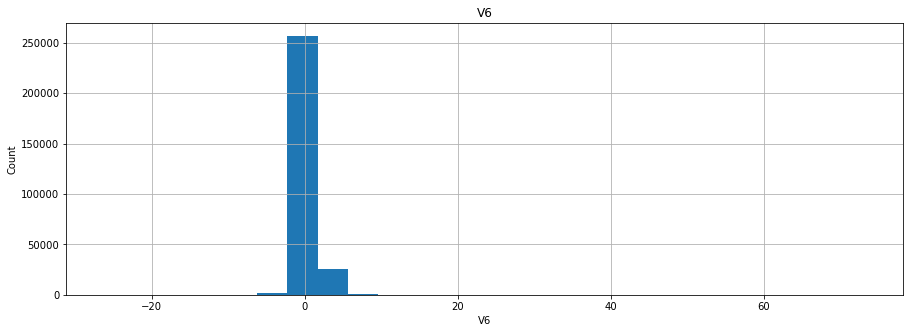

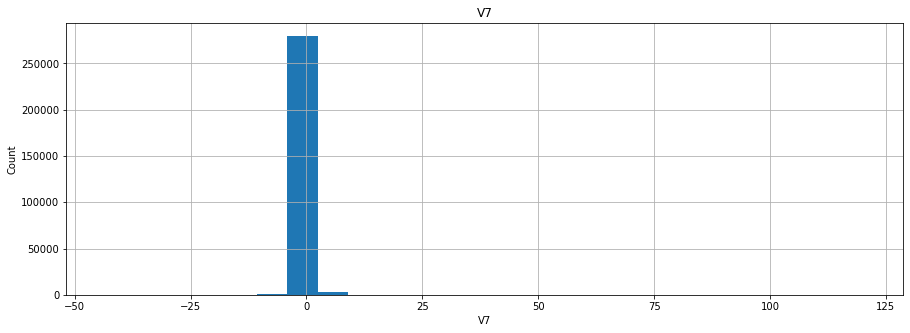

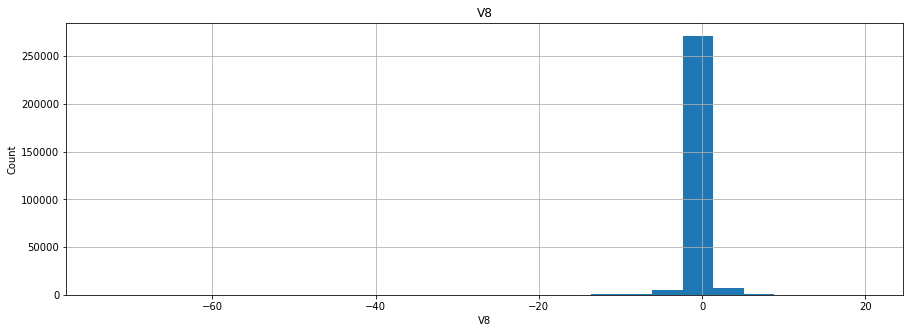

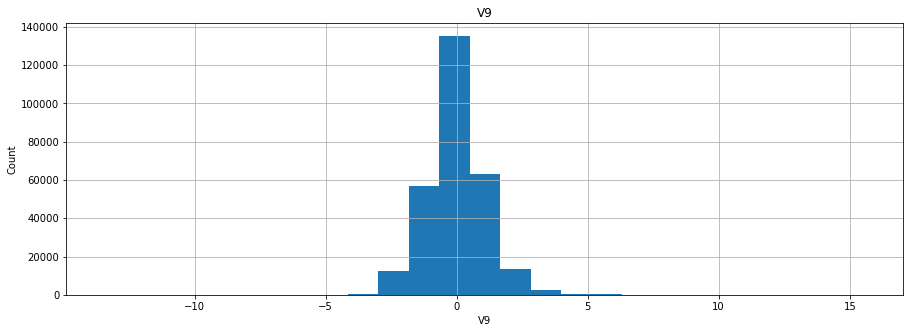

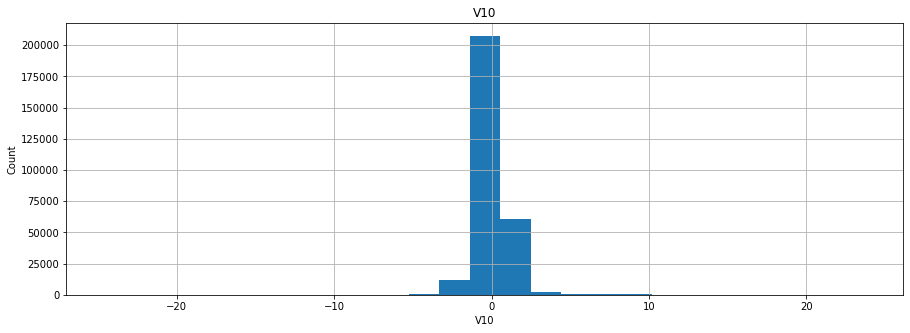

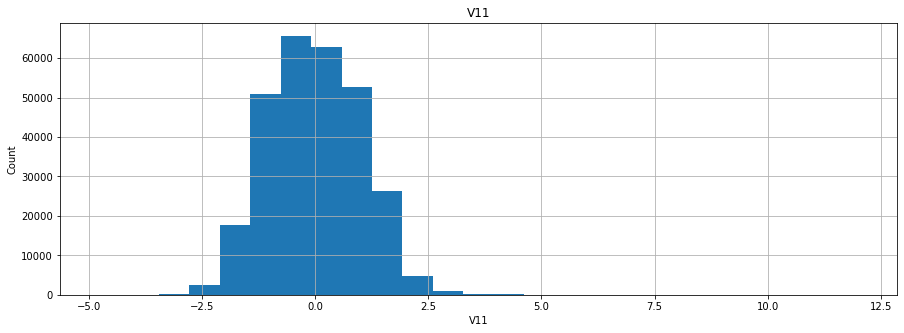

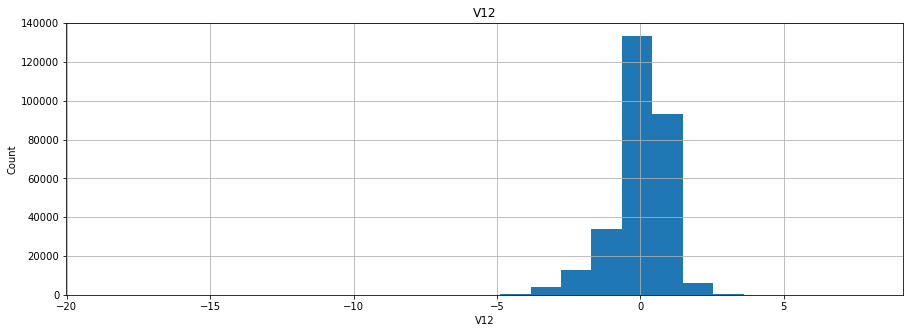

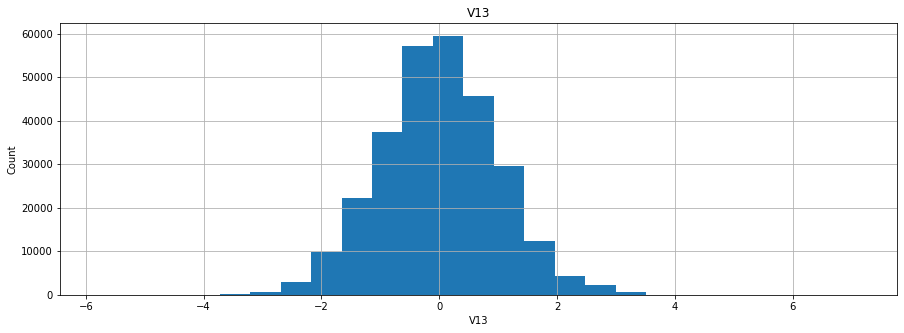

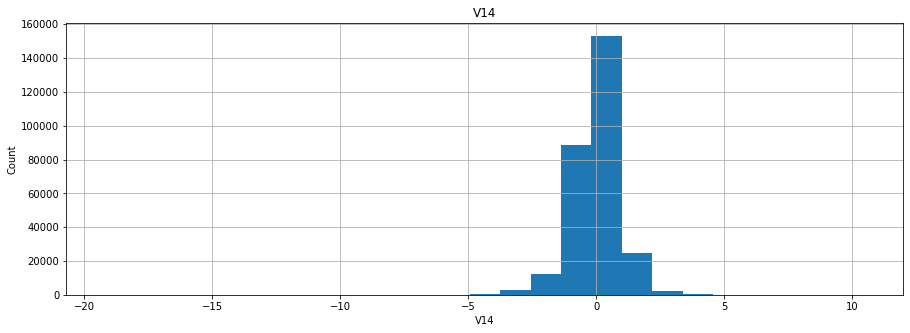

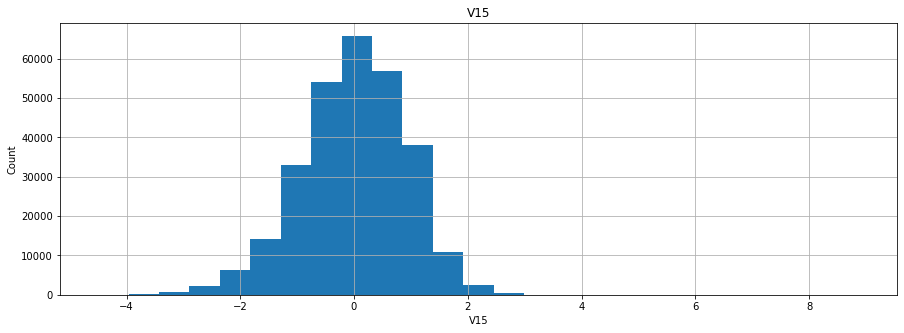

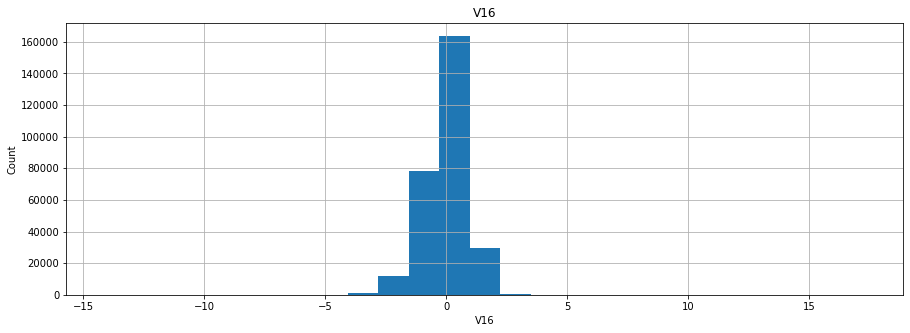

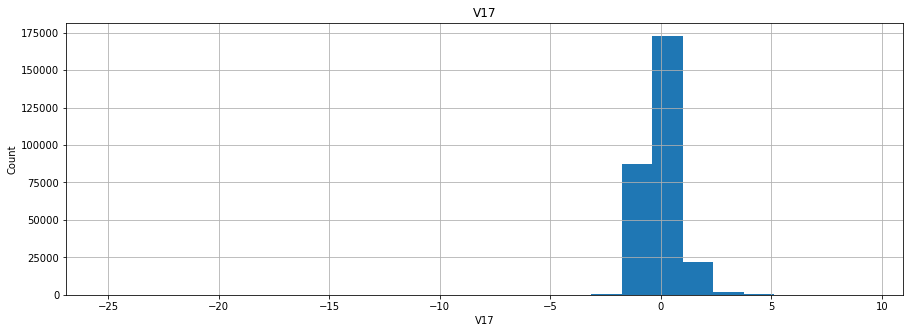

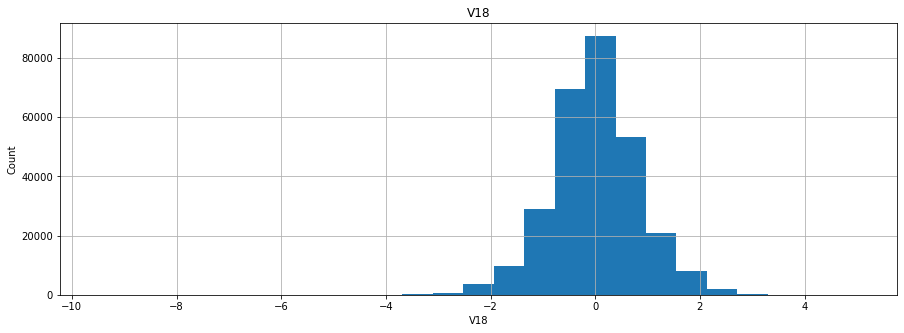

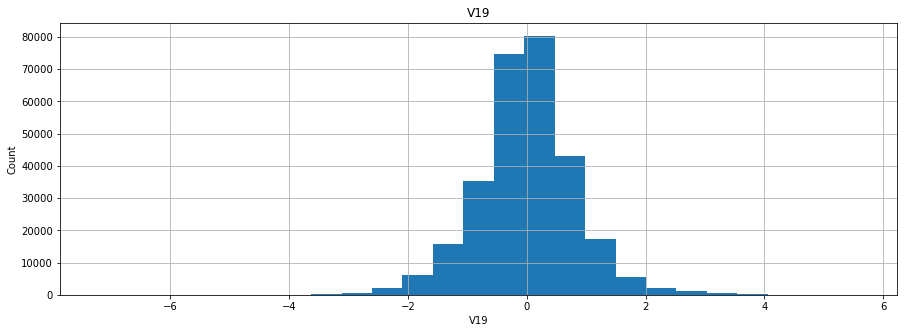

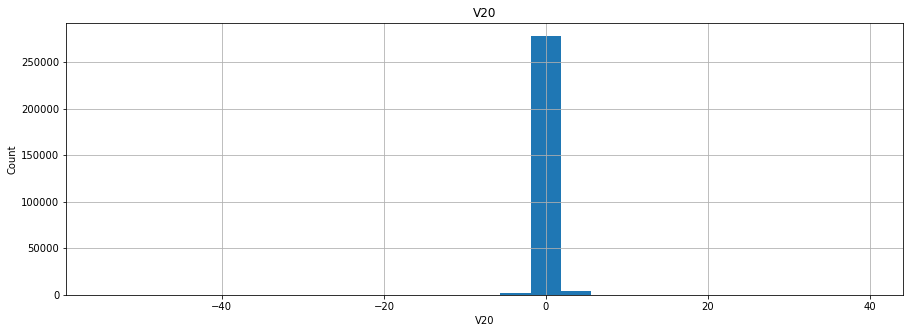

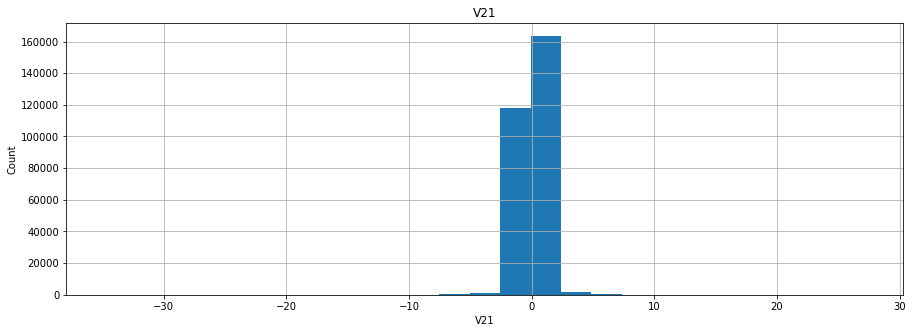

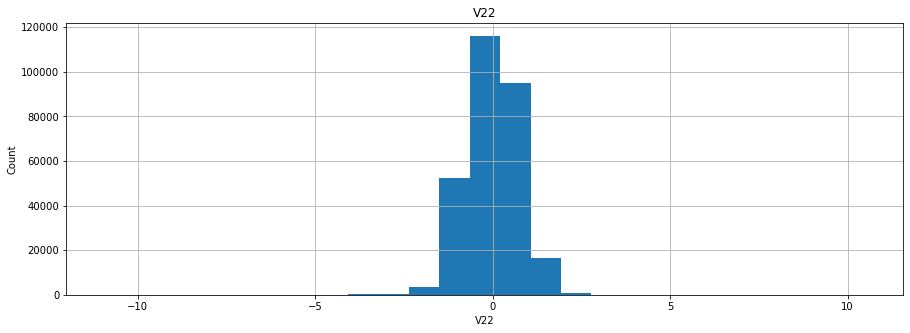

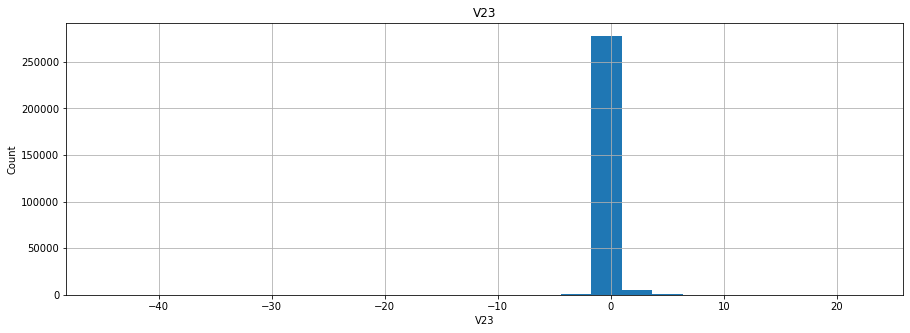

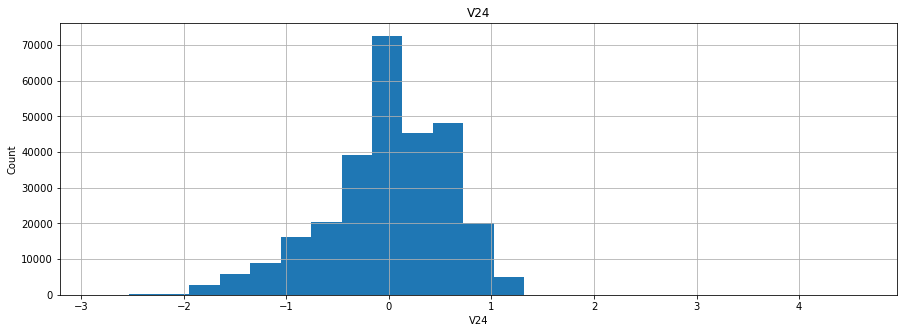

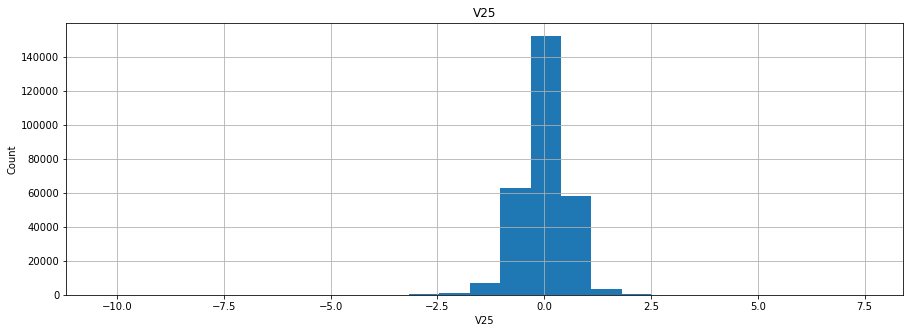

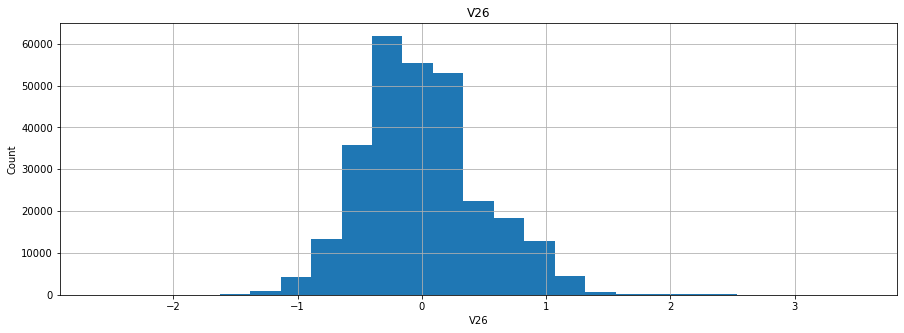

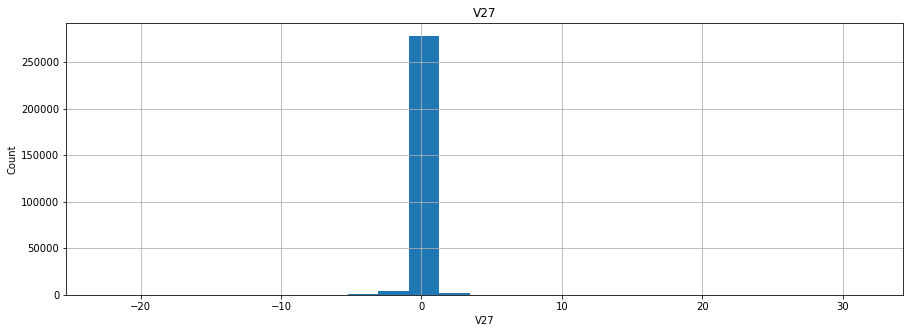

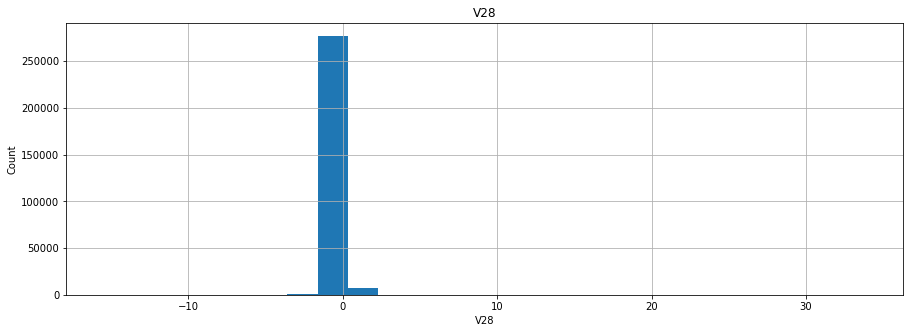

In [18]:
for feature in V_feat:
    dataset = data.copy()
    dataset[feature].hist(bins=25, figsize=(15,5))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Analysis Explorasi Data Analysis

dari hasil visualisasi data diperoleh informasi sebagai berikut:
* Dari visualisasi terlihat bahwa konsumen yang melakukan jarak transaksi saat ini dengan transaksi sebelumnya dengan rentang waktu 0 sampai dengan 50.000 detik dan rentang waktu 75.000 sampai dengan 100.000 terindikasi melakukan fraud kartu kredit
* Dari visualisasi terlihat bahwa nilai transaksi kartu kredit yang terindikasi melakukan fraud dibawa 500

# Data Preprocessing

In [19]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Melakukan proses binning Time 

In [20]:
data['Time'] = pd.cut(data['Time'], [-1, 0, 25000, 50000, 75000, 100000, 125000, 150000, 175000], labels=[1,2,3,4,5,6,7,8]).astype('int')

#### Melakukan proses binning Amount

In [21]:
data['Amount'] = pd.cut(data['Amount'], [-1, 0, 25, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000], labels=[1,2,3,4,5,6,7,8,9,10,11,12]).astype('int')

#### Melakukan proses binning V features

In [22]:
for feature in V_feat:
    data[feature] = pd.cut(data[feature], [-200.0 ,-100.0, -50.0 , -10.0, -5.0 , -3.0 , -0.0 , 3.0, 5.0, 10.0, 50.0, 100.0, 200.0 ], labels=[1,2,3,4,5,6,7,8,9,10,11,12]).astype('int')

proses binning dilakukan dengan mengelompokkan data numeric ke dalam bagian-bagian yang lebih kecil agar sebaran data lebih mudah dipahami

#### Melihat columns features setelah dilakukan binning

In [23]:
for col in data.columns:
    print(col,data[col].unique()[0:31], '\n')

Time [1 2 3 4 5 6 7 8] 

V1 [6 7 4 5 3 2] 

V2 [ 6  7  4  5  8  3  9 10  2] 

V3 [7 6 8 5 4 3 9] 

V4 [ 7  6  8  5  9 10  4] 

V5 [ 6  7  8  4  5  9  3 10  1] 

V6 [ 7  6  8  9  5 10  4  3 11] 

V7 [ 7  6  8  5  9 10  4  3 12] 

V8 [ 7  6  5  4  8  3  9 10  2] 

V9 [ 7  6  8  9  5 10  4  3] 

V10 [ 7  6  9  8  5 10  4  3] 

V11 [ 6  7  8  9 10  5] 

V12 [6 7 8 5 4 3 9] 

V13 [6 7 8 5 4 9] 

V14 [ 6  7  5  4  8  9  3 10] 

V15 [7 6 5 8 9] 

V16 [ 6  7  5  8  4  3  9 10] 

V17 [7 6 4 5 8 3 9] 

V18 [7 6 5 4 8 9] 

V19 [7 6 5 8 9 4] 

V20 [ 7  6  9  8  3  5  4 10  2] 

V21 [ 6  7  8  5  9 10  3  4] 

V22 [ 7  6  5  8  4  9  3 10] 

V23 [ 6  7  5  8  4 10  3  9] 

V24 [7 6 8] 

V25 [7 6 9 5 4 8 3] 

V26 [6 7 8] 

V27 [ 7  6  5  8  4  9 10  3] 

V28 [ 6  7  8  5  4  9 10  3] 

Amount [ 5  2  6  4  3  8  7  9  1 10 11 12] 

Class [0 1] 



In [24]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,5.301492,6.434561,6.513516,6.523014,6.518365,6.482541,6.434368,6.519485,6.507403,6.484928,6.451095,6.491164,6.562676,6.495220,6.522196,6.520050,6.531349,6.461618,6.496663,6.503927,6.408571,6.465789,6.502632,6.478770,6.551900,6.510806,6.467352,6.503643,6.558080,3.139565,0.001727
std,1.889737,0.658580,0.639767,0.578916,0.596200,0.582556,0.621712,0.566652,0.580869,0.532179,0.553179,0.507887,0.526100,0.508059,0.531672,0.504334,0.510859,0.519151,0.504923,0.507479,0.526627,0.533389,0.504071,0.520742,0.498076,0.500916,0.499060,0.507681,0.501618,1.518225,0.041527
min,1.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,5.000000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000,6.000000,3.000000,6.000000,3.000000,3.000000,1.000000,0.000000
25%,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,0.000000
50%,5.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,2.000000,0.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,0.000000
max,8.000000,7.000000,10.000000,9.000000,10.000000,10.000000,11.000000,12.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000,9.000000,10.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,8.000000,10.000000,10.000000,12.000000,1.000000


In [25]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Membuat dataset

In [26]:
col_to_use = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

dataset = data[col_to_use]
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

#### Menentukan variabel X

In [27]:
X = dataset

In [28]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,6,6,7,7,6,7,7,7,7,7,6,6,6,6,7,6,7,7,7,7,6,7,6,7,7,6,7,6,5
1,1,7,7,7,7,7,6,6,7,6,6,7,7,7,6,7,7,6,6,6,6,6,6,7,6,7,7,6,7,2
2,2,6,6,7,7,6,7,7,7,6,7,7,7,7,6,7,6,7,6,6,7,7,7,7,6,6,6,6,6,6
3,2,6,6,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6,7,6,6,6,7,6,6,7,6,7,7,5
4,2,6,7,7,7,6,7,7,6,7,7,6,7,7,6,7,6,6,6,7,7,6,7,6,7,6,7,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,8,3,10,4,6,4,6,5,9,7,8,6,7,6,8,6,7,7,7,6,7,7,7,7,6,7,7,7,7,2
284803,8,6,6,7,6,7,7,7,7,7,6,6,7,7,6,7,6,6,6,6,7,7,7,7,6,6,6,7,6,2
284804,8,7,6,5,6,7,8,6,7,7,6,7,7,6,6,7,7,7,7,6,7,7,7,6,7,7,6,7,6,4
284805,8,6,7,7,7,6,7,6,7,7,6,6,6,6,7,7,6,7,7,7,7,7,7,6,7,6,7,7,7,2


#### Melakukan normalisasi data

In [29]:
#scale = StandardScaler()
#X = scale.fit_transform(X)
#X.shape

# Pendefinisian dan Pelatihan Model

#### mendefinisikan dan melatih model GaussianMixture

In [30]:
model = GaussianMixture(n_components=2)

%time model.fit(X)

CPU times: user 30.8 s, sys: 4.65 s, total: 35.4 s
Wall time: 32.5 s


GaussianMixture(n_components=2)

mendefininisikan model dengan menggunakan 2 parameter untuk farud dan non fraud

# Evaluasi Model

In [31]:
labels = model.predict(X)

In [32]:
dataset['Anomaly'] = labels
dataset['Anomaly'].value_counts()

0    224401
1     60406
Name: Anomaly, dtype: int64

#### Visualisasi Model GaussianMixture

In [33]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [34]:
# menggunakan threshold 0.03 
scores = model.score_samples(X)

thresh = np.quantile(scores, 0.03)
print(thresh)

index = np.where(scores <= thresh)
outliers = X_PCA[index]

ValueError: Expected the input data X have 30 features, but got 31 features

In [ ]:
# Subplots of chol, age thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(20,30),
                              sharex=True
                              )

# add data to ax0
scatter = ax0.scatter(X_PCA[:, 0], X_PCA[:, 1]);

# customize ax0
ax0.set(title='Persebaran data');


# add data to ax1
scatter = ax1.scatter(X_PCA[:, 0], X_PCA[:,1]);
scatter = ax1.scatter(outliers[:,0],outliers[:,1], color='r');

# customize ax1
ax1.set(title='Persebaran Anomaly data');


# Model Inference

In [ ]:
values_1 = [1, 1, 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]
values_2 = [2, 5, 5 , 7 , 7 , 7 , 6 , 7 , 6 , 6 , 6 , 6 , 6 , 7 , 6 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 6 , 7 , 6 , 6 , 7 , 7]
values_3 = [4, 2, 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 3]
values_4 = [5, 2, 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 4]
values_5 = [7, 3, 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 6]
values_6 = [8, 3, 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 7]
values_7 = [8, 4, 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 8]
values_8 = [8, 4, 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 9]
values_9 = [8, 5, 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 11]
values_10 = [8, 5, 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 12]
values_11 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_12 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_13 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_14 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_15 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_16 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_17 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]
values_18 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]
values_19 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]

In [ ]:
values = [ values_1, values_2, values_3, values_4, values_5, values_6, values_7, values_8, values_9, values_10, values_11, values_12, values_13, values_14, values_15, values_16, values_17, values_18, values_19] 

In [ ]:
dataset.columns

In [ ]:
data_dummies = pd.DataFrame(values, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [ ]:
data_dummies

In [ ]:
prediction = model.predict(data_dummies)

print("Hasil prediksi model KMeans Clustering: \n")
print('Konsumen 1 termasuk dalam cluster {}'.format(prediction[0]))
print('Konsumen 1 termasuk dalam cluster {}'.format(prediction[1]))
print('Konsumen 2 termasuk dalam cluster {}'.format(prediction[2]))
print('Konsumen 2 termasuk dalam cluster {}'.format(prediction[3]))
print('Konsumen 3 termasuk dalam cluster {}'.format(prediction[4]))
print('Konsumen 3 termasuk dalam cluster {}'.format(prediction[5]))
print('Konsumen 4 termasuk dalam cluster {}'.format(prediction[6]))
print('Konsumen 4 termasuk dalam cluster {}'.format(prediction[7]))
print('Konsumen 5 termasuk dalam cluster {}'.format(prediction[8]))
print('Konsumen 5 termasuk dalam cluster {}'.format(prediction[9]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[10]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[11]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[12]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[13]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[14]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[15]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[16]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[17]))
print('Konsumen 6 termasuk dalam cluster {}'.format(prediction[18]))

#### Penjelasan Anomaly data

In [ ]:
for col in dataset:
    grid = sns.FacetGrid(dataset, col='Anomaly')
    grid.map(plt.hist, col)

Penjelasan Anomaly:

* Cluster Anomaly 0 adalah Konsumen yang melakukan transaksi kartu kredit tinggi pada saat tertentu

* Cluster Anomaly 1 adalah Konsumen melakukan transaksi kartu kredit secara normal atau transaksinya relatif merata

# Model Analysis

In [ ]:
values_time = [["0.0 - 0" , "0 - 25000", "25000 - 50000", "50000 - 75000", "75000 - 100000", "100000 - 125000",  "125000 - 150000", "150000 - 175000"]]

time = pd.DataFrame(values_time, columns=["1","2","3", "4" , "5" ,"6","7", "8" ])

values_amount = [["0.0 - 0" , "0 - 25", "25 - 50", "50 - 100", "100 - 200", "200 - 500",  "500 - 1000", "1000 - 2000", "2000 - 5000", "5000 - 10000", "10000 - 20000", "20000 - 30000"]]

amount = pd.DataFrame(values_amount, columns=["1","2","3","4","5","6","7","8","9","10","11","12"])

cons_id = [[ "-200.0 - -100.0", "-100.0 - -50.0" , "-50.0 - -10.0", "-10.0 - -5.0"  , "-5.0 - -3.0" , "-3.0 - -0.0" , "-0.0 - 3.0" , "3.0 - 5.0" , "5.0 - 10.0" , "10.0 - 50.0" , "50.0 - 100.0" , "100.0 - 200.0" ]]

cons = pd.DataFrame(cons_id, columns=["1","2","3","4","5","6","7","8","9","10","11","12"])

In [ ]:
print("Jarak transformasi PCA Identitas pengguna V1 - V28: ")
cons

In [ ]:
print("Jarak rata-rata antar transaksi (Detik):")
time

In [ ]:
print("Jarak Nilai Transaksi:")
amount

#### Analysis model inferent

dari hasil mencoba data baru untuk melakukan prediksi menggunakan model GaussianMixture ditarik informasi sebagai berikut:


1. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 1** atau Memiliki **range transformasi PCA antara -200.0 sampai dengan -100.0** 
    * melakukan **transaksi normal (type dengan jarak rata-rata antar transaksi 0.0 sampai dengan 25000 detik**   
    * dengan **nilai rata-rata transaksi 0 sampai 25**,
   
   akan dianggap **melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** pada saat:
    * melakukan **jarak rata-rata antar transaksi diatas 25000 detik** 
    * dengan **nilai rata-rata transaksi diatas 25**


2. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 2** atau memiliki **range transformasi PCA antara -100.0 sampai dengan -50.0**  
    * melakukan **transaksi normal (type 1) dengan jarak rata-rata antar transaksi 0 sampai dengan 75000 detik** 
    * dengan **nilai rata-rata transaksi 0 sampai 50**, 
    
   akan dianggap **melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** pada saat: 
    * melakukan **jarak rata-rata antar transaksi diatas 75000 detik** 
    * dengan **nilai rata-rata transaksi diatas 50**


3. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 3** atau memiliki **range transformasi PCA antara -50.0 sampai dengan -10.0**  
    * melakukan **transaksi normal (type 1) dengan jarak rata-rata antar transaksi 0 sampai dengan 150000 detik** 
    * dengan **nilai rata-rata transaksi 0 sampai 500**, 
    
   akan dianggap **melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** pada saat: 
    * melakukan **jarak rata-rata antar transaksi diatas 150000 detik** 
    * dengan **nilai rata-rata transaksi diatas 500**


4. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 4** atau memiliki **range transformasi PCA antara -10.0 sampai dengan -5.0**  
    * melakukan **transaksi normal (type 1) dengan jarak rata-rata antar transaksi 0 sampai dengan 175000 detik** 
    * dengan **nilai rata-rata transaksi 0 sampai 2000**, 
    
   akan dianggap **melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** pada saat: 
    * melakukan **nilai rata-rata transaksi diatas 2000**


5. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 5** atau memiliki **range transformasi PCA antara -5.0 sampai dengan -3.0** 
    * melakukan **transaksi normal (type 1) dengan jarak rata-rata antar transaksi 0 sampai dengan 175000 detik** 
    * dengan **nilai rata-rata transaksi 0 sampai 20000**, 
    
   akan dianggap **melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** pada saat: 
    * melakukan **nilai rata-rata transaksi diatas 20000**


6. Dari modelling GaussianMixture didapatkan informasi bahwa konsumen dengan **Identitas pengguna V1 - V28 dengan nilai 6** keatas **melakukan transaksi kartu kredit secara normal atau transaksinya relatif merata (type 1) atau tidak ada yang melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)** 


hasil analysis model GaussianMixture dengan menggunakan model inference (data baru) hampir menyerupai dengan hasil analysis Explorasi Data Analysis yaitu: 

* Dari visualisasi terlihat bahwa konsumen yang melakukan jarak transaksi saat ini dengan transaksi sebelumnya dengan rentang waktu 0 sampai dengan 50.000 detik dan rentang waktu 75.000 sampai dengan 100.000 terindikasi melakukan fraud kartu kredit (anomaly data)

* Dari visualisasi terlihat bahwa nilai transaksi kartu kredit yang terindikasi melakukan fraud dibawa 500


# Overal Analysis

dari hasil Anomaly Detection dengan model Gaussian Mixture dapat disimpulkan sebagai berikut:

1. konsumen yang melakukan suatu anomali atau kegiatan yang diluar kebiasaan (type anomali 0) adalah: 
    * konsumen dengan Identitas pengguna V1 - V28 dengan nilai 1 sampai dengan nilai 5 atau memiliki range transformasi PCA antara -200.0 sampai dengan -3.0 
    * konsumen dengan jarak rata-rata antar transaksi 0 sampai dengan 175000 detik
    * konsumen dengan nilai rata-rata transaksi 0 sampai 20000
    
    
    
2. konsumen dengan Identitas pengguna V1 - V28 dengan nilai 6 keatas atau memiliki range transformasi PCA 0.0 keatas cenderung melakukan transaksi kartu kredit secara normal atau transaksinya relatif merata (type 1) atau tidak ada yang melakukan transaksi kartu kredit tinggi pada saat tertentu (type 0)